<IPython.core.display.Javascript object>


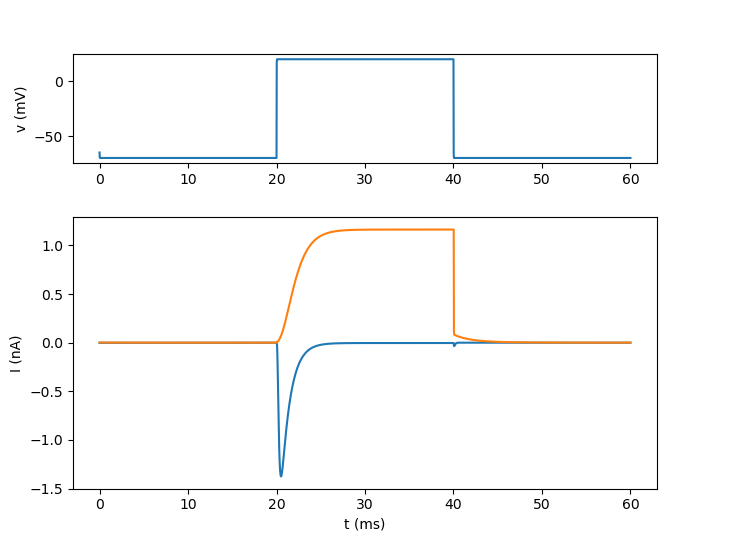

Text(0, 0.5, 'I (nA)')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h, gui

from neuron.units import ms, mV


soma = h.Section(name="soma")
soma.L = 200
soma.diam = 20
soma.insert("hh")
soma.insert("pas")
soma(0.5).pas.g=0.001
soma(0.5).hh.gkbar=0.015

vclamp= h.VClamp(soma(0.5))
#print([item for item in dir(vclamp) if not item.startswith("__")])
vclamp.amp[0]=-70
vclamp.dur[0]=20
vclamp.amp[1]=20 # test voltage
vclamp.dur[1]=20
vclamp.amp[2]=-70
vclamp.dur[2]=20


v = h.Vector().record(soma(0.5)._ref_v)  # Membrane potential vector
ina = h.Vector().record(soma(0.5)._ref_ina)  # sodium current vector
ik = h.Vector().record(soma(0.5)._ref_ik)  # potassoium current vector
t = h.Vector().record(h._ref_t)  # Time stamp vector
h.load_file("stdrun.hoc")

h.finitialize(-65 * mV)
h.continuerun(60 * ms)

%matplotlib notebook
fig=plt.figure()
ax=fig.add_axes([0.1, 0.7, 0.8, 0.2])
ax.plot(t,v)
ax.set_ylabel("v (mV)")
ax=fig.add_axes([0.1, 0.1, 0.8, 0.5])
ax.plot(t, ina)
ax.plot(t, ik)
ax.set_xlabel("t (ms)")
ax.set_ylabel("I (nA)")


<IPython.core.display.Javascript object>


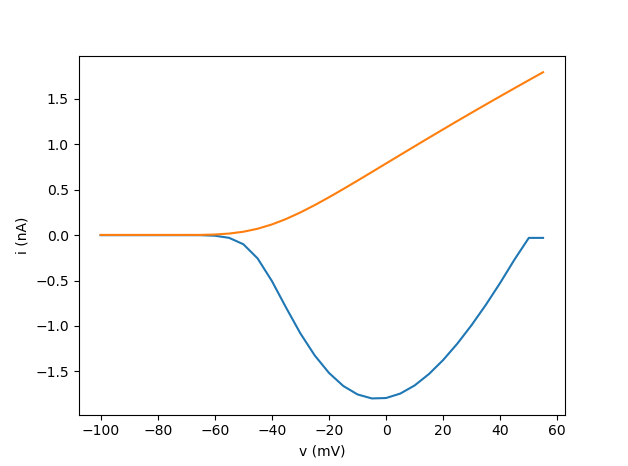

Text(0, 0.5, 'i (nA)')

In [5]:
# write a for loop for different values of test voltage np.arange(-100,25,5)
voltage=[]
current_na=[]
current_k=[]

%matplotlib notebook
plt.figure()
for vamp in np.arange(-100,60,5):
    vclamp.amp[1] = vamp
    h.finitialize(-65 * mV)
    h.continuerun(60 * ms)
    #ina = h.Vector().record(soma(0.5)._ref_ina)  # sodium current vector
    #ik = h.Vector().record(soma(0.5)._ref_ik)  # potassoium current vector
    ina_min = np.min(np.array(ina))
    ik_max = np.max(np.array(ik))
    
    current_na.append(ina_min)
    current_k.append(ik_max)
    voltage.append(vamp)
    
#print(v)
plt.plot(voltage, current_na)
plt.plot(voltage, current_k)


plt.xlabel("v (mV)")
plt.ylabel("i (nA)")

In [5]:
np.min(np.array(ina))

-0.0012200571764654333

<IPython.core.display.Javascript object>


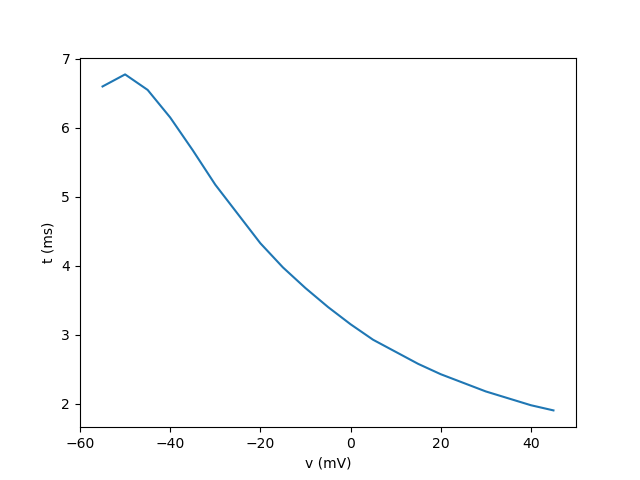

Text(0, 0.5, 't (ms)')

In [7]:
tau_k = []
voltage = []
%matplotlib notebook
plt.figure()
for vamp in np.arange(-55,50,5):
    vclamp.amp[1] = vamp
    h.finitialize(-65 * mV)
    h.continuerun(60 * ms)
    x_min = np.min(np.array(ik))
    x_max = np.max(np.array(ik))
    x_tau = (x_max - x_min)*0.63
    idmin=np.argmin(np.abs(np.array(ik)-x_tau))
    tau = np.array(t)[idmin]-20
    voltage.append(vamp)
    tau_k.append(tau)
    
plt.plot(voltage, tau_k)


plt.xlabel("v (mV)")
plt.ylabel("t (ms)")